<a href="https://colab.research.google.com/github/Ahmadrezauf/IML_Projects/blob/master/task_4/main_project4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigating of data

In [0]:
import pandas as pd
import pickle
import numpy as np
import os
import random

from google.colab import files
import io
import time

import pdb
import cv2
import matplotlib.pyplot as plt

import keras.backend as K
from keras import Sequential

from keras.layers import Dense, Dropout, Activation, SimpleRNN, LSTM, Conv1D, MaxPooling1D, AveragePooling1D, Embedding
from keras.layers import BatchNormalization
from keras.layers import AlphaDropout
from keras.layers import Conv2D, MaxPooling2D, Flatten, Lambda, Input, Layer

from keras.regularizers import l2

from keras.models import Model

from keras import regularizers
from keras.optimizers import SGD
from keras.callbacks import Callback,ModelCheckpoint, EarlyStopping
from keras import initializers

from matplotlib import pyplot as plt

In [0]:
# # uploading files to server from local computer
# uploaded = files.upload()

# # files will be uploaded to the current directory of the server
# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))


# train_trip = pd.read_csv(io.StringIO(uploaded['train_triplets.txt'].decode('utf-8')), header = None, delim_whitespace=True)
# test_trip = pd.read_csv(io.StringIO(uploaded['test_triplets.txt'].decode('utf-8')), header = None, delim_whitespace=True)

In [0]:
# # unzipping food file if imported
#!unzip food.zip

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)
import os
workDir = input('input the working directory: ')
os.chdir(workDir)

Mounted at /content/drive
input the working directory: /content/drive/My Drive/ETHZ/IML/Project_4


In [0]:
D_train = pd.read_csv('train_triplets.txt', header = None, delim_whitespace=True)
D_test = pd.read_csv('test_triplets.txt', header = None, delim_whitespace=True)

In [0]:
# performing some common sense checks
print(f'Data train \n {D_train.head()}')
print(f'Data test \n {D_test.head()}')
print(f'Percentage of unique values per row: \n{round(100*D_train.nunique()/D_train.shape[0],2)}')

Data train 
       0     1     2
0  2461  3450  2678
1  2299  2499  4987
2  4663  1056  3029
3  4532  1186  1297
4  3454  3809  2204
Data test 
       0     1     2
0  9896  9640  9177
1  6592  9283  7104
2  8655  6174  6400
3  9223  8187  8678
4  7317  5392  9470
Percentage of unique values per row: 
0    7.25
1    8.14
2    8.38
dtype: float64


Images in row: 2461 3450 2678


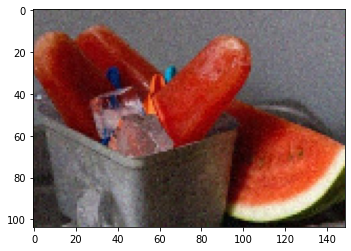

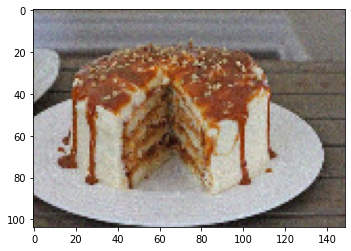

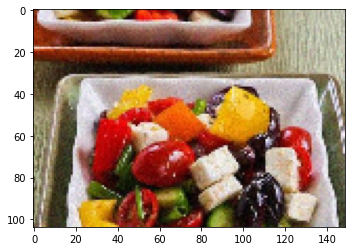

Images in row: 2299 2499 4987


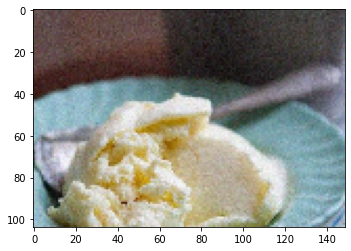

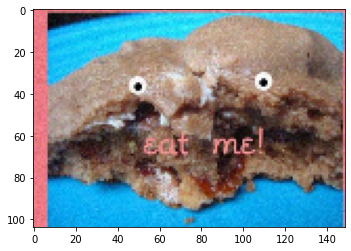

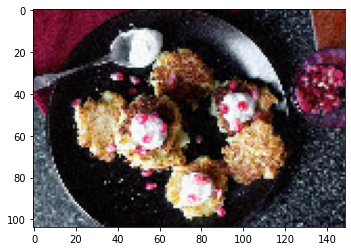

Images in row: 4663 1056 3029


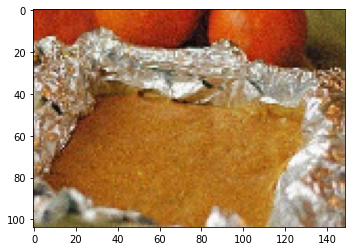

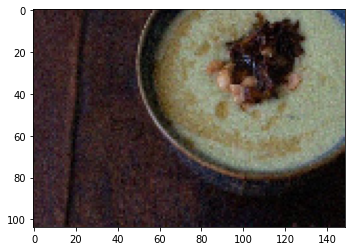

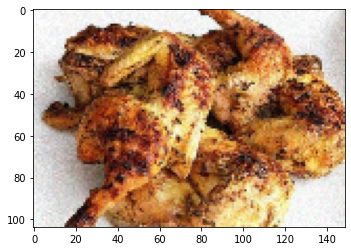

Images in row: 4532 1186 1297


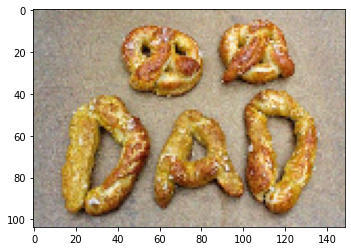

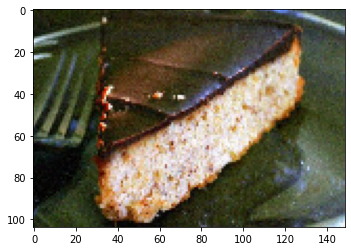

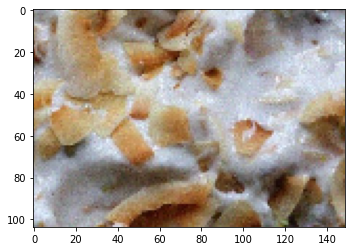

Images in row: 3454 3809 2204


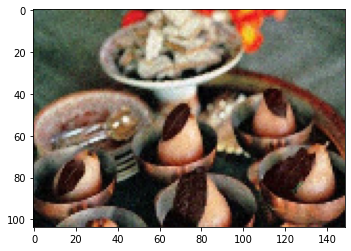

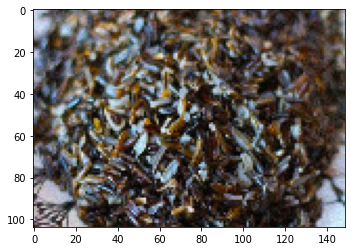

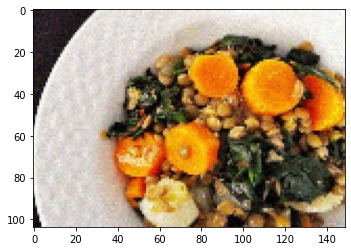

In [0]:
# importing images into array img_array and visualize
# define directory of images
import cv2
import matplotlib.pyplot as plt
path = 'food/'
first_n_img = 5
percResize = 0.35

# create resizing tuple
img_array = cv2.imread(f'{path}00001.jpg')
new_size = np.round(np.array(img_array.shape) * percResize)
new_size = tuple(np.flip(new_size.astype(int)[0:2]))



fig = plt.figure()

# plot first_n_img number of rows
counter = 0
for idx, row in D_train.iterrows():
  if idx > first_n_img-1:
    break
  
  print(f'Images in row: {row[0]} {row[1]} {row[2]}')

  img_dir0 = f'{path}{row[0]:05d}.jpg'
  img_dir1 = f'{path}{row[1]:05d}.jpg'
  img_dir2 = f'{path}{row[2]:05d}.jpg'

  img_array0 = cv2.imread(img_dir0)
  img_array1 = cv2.imread(img_dir1)
  img_array2 = cv2.imread(img_dir2)

  # open cv outputs as BGR image vs matplotlib reads as RGB image
  img_array0 = cv2.cvtColor(img_array0, cv2.COLOR_BGR2RGB)
  img_array1 = cv2.cvtColor(img_array1, cv2.COLOR_BGR2RGB)
  img_array2 = cv2.cvtColor(img_array2, cv2.COLOR_BGR2RGB)

  plt.imshow(cv2.resize(img_array0, new_size))
  plt.show()
  plt.imshow(cv2.resize(img_array1, new_size))
  plt.show()
  plt.imshow(cv2.resize(img_array2, new_size))
  plt.show()

The tables below were sorted. The first table for sorted for the 1st column, the 2nd table for the 2nd column and the 3rd for the 3rd column.From the tables below we can see that the labels are not unique per image, plain categorization doesn't seem to work here. Also, the same image might appear more than one time in any column.

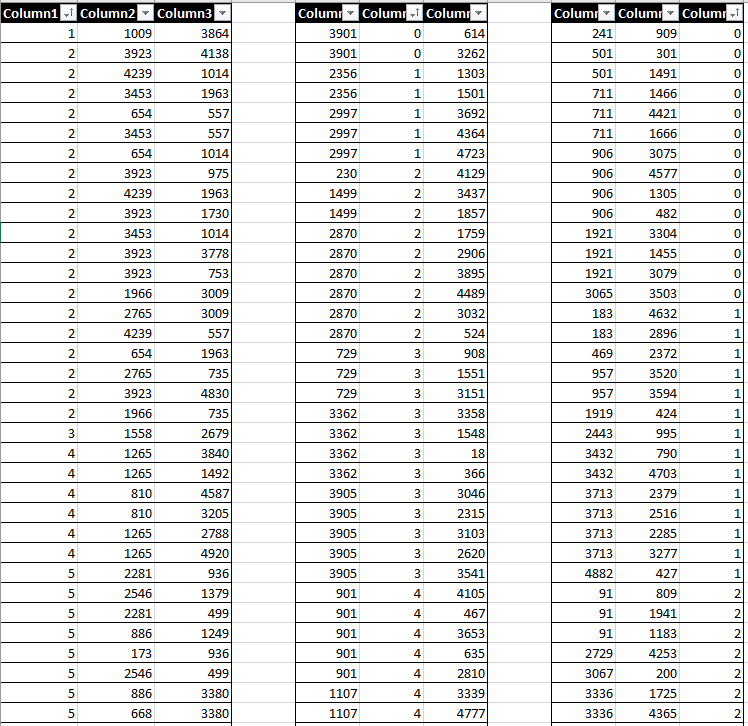

# Discovering potential approaches

In [0]:
from IPython.display import HTML

# HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/d2XB5-tuCWU" frameborder="0" allowfullscreen></iframe>')
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/OuNH5kT-aD0" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [0]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/5PL0TmQhItY" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Other good resources:

*   List item

*   List item
*   List item


*   List item



1.   https://www.youtube.com/watch?v=NEaUSP4YerM

2.   https://www.youtube.com/watch?v=eDGWcIt10d8

3.   https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_11_03_embedding.ipynb

4. https://medium.com/@crimy/one-shot-learning-siamese-networks-and-triplet-loss-with-keras-2885ed022352

5. https://github.com/CrimyTheBold/tripletloss/blob/master/02%20-%20tripletloss%20MNIST.ipynb

6. https://arxiv.org/abs/1904.01643



Approach most likely involves 2 steps:

1.   Embed the information to reduce dimensionality - dimensionality will be a hyper parameter **- probably most difficult part in this problem is clustering**
2.   Classify the images with labels corresponding to the reduced dimensionality
3.   Classify the 3 test images according to the lower dimensional categories and see which categories are closer in meaning

Another approach could be to use a Siamese neural network. Glancing through the images, it doesn't seem like there are categories that are very similar. There might be however.

# Potentially useful functions from the implementation of others
### To be used when the code advances

In [0]:
nb_classes = 10
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

def buildDataSet():
    """Build dataset for train and test
    
    
    returns:
        dataset : list of lengh 10 containing images for each classes of shape (?,28,28,1)
    """
    (x_train_origin, y_train_origin), (x_test_origin, y_test_origin) = mnist.load_data()

    assert K.image_data_format() == 'channels_last'
    x_train_origin = x_train_origin.reshape(x_train_origin.shape[0], img_rows, img_cols, 1)
    x_test_origin = x_test_origin.reshape(x_test_origin.shape[0], img_rows, img_cols, 1)
    
    dataset_train = []
    dataset_test = []
    
    #Sorting images by classes and normalize values 0=>1
    for n in range(nb_classes):
        images_class_n = np.asarray([row for idx,row in enumerate(x_train_origin) if y_train_origin[idx]==n])
        dataset_train.append(images_class_n/255)
        
        images_class_n = np.asarray([row for idx,row in enumerate(x_test_origin) if y_test_origin[idx]==n])
        dataset_test.append(images_class_n/255)
        
    return dataset_train,dataset_test,x_train_origin,y_train_origin,x_test_origin,y_test_origin

In [0]:
def get_batch_random(batch_size,s="train"):
    """
    Create batch of APN triplets with a complete random strategy
    
    Arguments:
    batch_size -- integer 

    Returns:
    triplets -- list containing 3 tensors A,P,N of shape (batch_size,w,h,c)
    """
    if s == 'train':
        X = dataset_train
    else:
        X = dataset_test

    m, w, h,c = X[0].shape
    
    
    # initialize result
    triplets=[np.zeros((batch_size,h, w,c)) for i in range(3)]
    
    for i in range(batch_size):
        #Pick one random class for anchor
        anchor_class = np.random.randint(0, nb_classes)
        nb_sample_available_for_class_AP = X[anchor_class].shape[0]
        
        #Pick two different random pics for this class => A and P
        [idx_A,idx_P] = np.random.choice(nb_sample_available_for_class_AP,size=2,replace=False)
        
        #Pick another class for N, different from anchor_class
        negative_class = (anchor_class + np.random.randint(1,nb_classes)) % nb_classes
        nb_sample_available_for_class_N = X[negative_class].shape[0]
        
        #Pick a random pic for this negative class => N
        idx_N = np.random.randint(0, nb_sample_available_for_class_N)

        triplets[0][i,:,:,:] = X[anchor_class][idx_A,:,:,:]
        triplets[1][i,:,:,:] = X[anchor_class][idx_P,:,:,:]
        triplets[2][i,:,:,:] = X[negative_class][idx_N,:,:,:]

    return triplets

def drawTriplets(tripletbatch, nbmax=None):
    """display the three images for each triplets in the batch
    """
    labels = ["Anchor", "Positive", "Negative"]

    if (nbmax==None):
        nbrows = tripletbatch[0].shape[0]
    else:
        nbrows = min(nbmax,tripletbatch[0].shape[0])
                 
    for row in range(nbrows):
        fig=plt.figure(figsize=(16,2))
    
        for i in range(3):
            subplot = fig.add_subplot(1,3,i+1)
            axis("off")
            plt.imshow(tripletbatch[i][row,:,:,0],vmin=0, vmax=1,cmap='Greys')
            subplot.title.set_text(labels[i])

In [0]:
def build_network(input_shape, embeddingsize):
    '''
    Define the neural network to learn image similarity
    Input : 
            input_shape : shape of input images
            embeddingsize : vectorsize used to encode our picture   
    '''
     # Convolutional Neural Network
    network = Sequential()
    network.add(Conv2D(128, (7,7), activation='relu',
                     input_shape=input_shape,
                     kernel_initializer='he_uniform',
                     kernel_regularizer=l2(2e-4)))
    network.add(MaxPooling2D())
    network.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform',
                     kernel_regularizer=l2(2e-4)))
    network.add(MaxPooling2D())
    network.add(Conv2D(256, (3,3), activation='relu', kernel_initializer='he_uniform',
                     kernel_regularizer=l2(2e-4)))
    network.add(Flatten())
    network.add(Dense(4096, activation='relu',
                   kernel_regularizer=l2(1e-3),
                   kernel_initializer='he_uniform'))
    
    
    network.add(Dense(embeddingsize, activation=None,
                   kernel_regularizer=l2(1e-3),
                   kernel_initializer='he_uniform'))
    
    #Force the encoding to live on the d-dimentional hypershpere
    network.add(Lambda(lambda x: K.l2_normalize(x,axis=-1)))
    
    return network

In [0]:
class TripletLossLayer(Layer):
    def __init__(self, alpha, **kwargs):
        self.alpha = alpha
        super(TripletLossLayer, self).__init__(**kwargs)
    
    def triplet_loss(self, inputs):
        anchor, positive, negative = inputs
        p_dist = K.sum(K.square(anchor-positive), axis=-1)
        n_dist = K.sum(K.square(anchor-negative), axis=-1)
        return K.sum(K.maximum(p_dist - n_dist + self.alpha, 0), axis=0)
    
    def call(self, inputs):
        loss = self.triplet_loss(inputs)
        self.add_loss(loss)
        return loss
      

In [0]:
def build_model(input_shape, network, margin=0.2):
    '''
    Define the Keras Model for training 
        Input : 
            input_shape : shape of input images
            network : Neural network to train outputing embeddings
            margin : minimal distance between Anchor-Positive and Anchor-Negative for the lossfunction (alpha)
    
    '''
     # Define the tensors for the three input images
    anchor_input = Input(input_shape, name="anchor_input")
    positive_input = Input(input_shape, name="positive_input")
    negative_input = Input(input_shape, name="negative_input") 
    
    # Generate the encodings (feature vectors) for the three images
    encoded_a = network(anchor_input)
    encoded_p = network(positive_input)
    encoded_n = network(negative_input)
    
    #TripletLoss Layer
    loss_layer = TripletLossLayer(alpha=margin,name='triplet_loss_layer')([encoded_a,encoded_p,encoded_n])
    
    # Connect the inputs with the outputs
    network_train = Model(inputs=[anchor_input,positive_input,negative_input],outputs=loss_layer)
    
    # return the model
    return network_train

In [0]:
def compute_probs(network,X,Y):
    '''
    Input
        network : current NN to compute embeddings
        X : tensor of shape (m,w,h,1) containing pics to evaluate
        Y : tensor of shape (m,) containing true class
        
    Returns
        probs : array of shape (m,m) containing distances
    
    '''
    m = X.shape[0]
    nbevaluation = int(m*(m-1)/2)
    probs = np.zeros((nbevaluation))
    y = np.zeros((nbevaluation))
    
    #Compute all embeddings for all pics with current network
    embeddings = network.predict(X)
    
    size_embedding = embeddings.shape[1]
    
    #For each pics of our dataset
    k = 0
    for i in range(m):
            #Against all other images
            for j in range(i+1,m):
                #compute the probability of being the right decision : it should be 1 for right class, 0 for all other classes
                probs[k] = -compute_dist(embeddings[i,:],embeddings[j,:])
                if (Y[i]==Y[j]):
                    y[k] = 1
                    #print("{3}:{0} vs {1} : {2}\tSAME".format(i,j,probs[k],k))
                else:
                    y[k] = 0
                    #print("{3}:{0} vs {1} : \t\t\t{2}\tDIFF".format(i,j,probs[k],k))
                k += 1
    return probs,y
#probs,yprobs = compute_probs(network,x_test_origin[:10,:,:,:],y_test_origin[:10])

def compute_metrics(probs,yprobs):
    '''
    Returns
        fpr : Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i]
        tpr : Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i].
        thresholds : Decreasing thresholds on the decision function used to compute fpr and tpr. thresholds[0] represents no instances being predicted and is arbitrarily set to max(y_score) + 1
        auc : Area Under the ROC Curve metric
    '''
    # calculate AUC
    auc = roc_auc_score(yprobs, probs)
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(yprobs, probs)
    
    return fpr, tpr, thresholds,auc

In [0]:
def compute_interdist(network):
    '''
    Computes sum of distances between all classes embeddings on our reference test image: 
        d(0,1) + d(0,2) + ... + d(0,9) + d(1,2) + d(1,3) + ... d(8,9)
        A good model should have a large distance between all theses embeddings
        
    Returns:
        array of shape (nb_classes,nb_classes) 
    '''
    res = np.zeros((nb_classes,nb_classes))
    
    ref_images = np.zeros((nb_classes,img_rows,img_cols,1))
    
    #generates embeddings for reference images
    for i in range(nb_classes):
        ref_images[i,:,:,:] = dataset_test[i][0,:,:,:]
    ref_embeddings = network.predict(ref_images)
    
    for i in range(nb_classes):
        for j in range(nb_classes):
            res[i,j] = dist(ref_embeddings[i],ref_embeddings[j])
    return res

#ACTUAL CODE: 


## Import & Pre-process Images
#### perhaps it is better import the images through the generator

In [1]:
import pandas as pd
import pickle
import numpy as np
import os
import random

from google.colab import files
import io
import time

import pdb
import cv2
import matplotlib.pyplot as plt

import keras.backend as K
from keras import Sequential

from keras.layers import Dense, Dropout, Activation, SimpleRNN, LSTM, Conv1D, MaxPooling1D, AveragePooling1D, Embedding
from keras.layers import BatchNormalization
from keras.layers import AlphaDropout
from keras.layers import Conv2D, MaxPooling2D, Flatten, Lambda, Input, Layer

from keras.regularizers import l2

from keras.models import Model

from keras import regularizers
from keras.optimizers import SGD
from keras.callbacks import Callback,ModelCheckpoint, EarlyStopping
from keras import initializers

from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)
import os
workDir = '/content/drive/My Drive/ETHZ/IML/Project_4' #input('input the working directory: ')
os.chdir(workDir)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Hyperparameters

In [0]:
# desired image size for input to layer in format (w,h)
imgSize = (25,25)
# embedding size
emb_size = 10
# margin for triplet loss
alpha = 2.0

In [4]:
if os.path.exists('img_list.pickle'):
  pickle_in = open( "img_list.pickle", "rb" )
  food_images = pickle.load(pickle_in)
  pickle_in.close()
  print("The image array was successfully loaded")
else:
  num_food_images = 10000
  path = 'food/'
  imageSize = (450,300)

  temp = np.zeros([imageSize[0],imageSize[1]])

  food_images = [temp]*num_food_images

  for indx in range(0, num_food_images):

    # reading in images and adding it to array
    fileName = f'{path}{indx:05d}.jpg'
    # color correct from BGR to RGB 
    img = cv2.imread(fileName)
    # resize image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # resize image
    img = cv2.resize(img, imageSize)
    # appending image
    food_images[indx] = img

    if indx%100 == 0:
      print(f'The progress is {round(indx/num_food_images*100,1)} %')

  saveY = input('Do you want to save the generated array? y/n')
  if saveY == 'y':
    pickle_out = open("img_list.pickle","wb")
    pickle.dump(food_images, pickle_out)
    pickle_out.close()
    print('The image array was successfully saved')
  else:
    print('The image array was NOT saved')

The image array was successfully loaded


# Import Train and Test Triplets

In [0]:
D_train = pd.read_csv('train_triplets.txt', header = None, delim_whitespace=True)
D_test = pd.read_csv('test_triplets.txt', header = None, delim_whitespace=True)

train_triplets = np.array(D_train)
test_triplets = np.array(D_test)

num_train_triplets = np.shape(D_train)[0]
num_test_triplets = np.shape(D_test)[0]

## k-fold

In [269]:
# splitting data triplets
k_fold = 5

from sklearn.model_selection import KFold
kf = KFold(n_splits = k_fold, shuffle=True, random_state=1)

X = np.array(D_train)
# specify pseudo classification for split function
y = np.ones(X.shape[0])

k_index = list(kf.split(X,y))
k_index = np.array(k_index)

# visualize first k fold validation with training set
X[k_index[0][0],:]

array([[2461, 3450, 2678],
       [2299, 2499, 4987],
       [4663, 1056, 3029],
       ...,
       [3255, 4844, 4334],
       [2136, 4619,  161],
       [2509, 2552, 3406]])

In [0]:
def create_batch(fold, batch_size=256, toSize = (450,300), flatten = True):
    
    if flatten:
      x_anchors = np.zeros((batch_size, toSize[0]*toSize[1]*3))
      x_positives = np.zeros((batch_size, toSize[0]*toSize[1]*3))
      x_negatives = np.zeros((batch_size, toSize[0]*toSize[1]*3))
    else:
      x_anchors = np.zeros([batch_size, toSize[1], toSize[0], 3])
      x_positives = np.zeros([batch_size, toSize[1], toSize[0], 3])
      x_negatives = np.zeros([batch_size, toSize[1], toSize[0], 3])

    
    # get random samples from train triplets
    for i in range(0, batch_size):
        # preprocessing

        # We need to find an anchor, a positive example and a negative example
        random_index = random.randint(0, fold.shape[0]-1)
        triplet = fold[random_index]

        # reshaping, normalizing and flattening images --> this will take more time than pre-processed data, but will eliminate RAM issues

        x_anchor = cv2.resize(food_images[triplet[0]],toSize)/255.0
        x_positive = cv2.resize(food_images[triplet[1]],toSize)/255.0
        x_negative = cv2.resize(food_images[triplet[2]],toSize)/255.0

        if flatten:
          x_anchor = np.reshape(x_anchor, np.prod(x_anchor.shape))
          x_positive = np.reshape(x_positive, np.prod(x_positive.shape))
          x_negative = np.reshape(x_negative, np.prod(x_negative.shape))
             
        x_anchors[i] = x_anchor
        x_positives[i] = x_positive
        x_negatives[i] = x_negative
        
    return [x_anchors, x_positives, x_negatives]

(25, 25)
1875


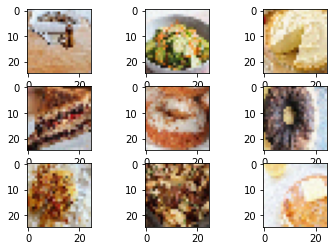

In [96]:
# Example how to use function
# tr = create_batch(fold, batch_size=1, toSize = (100,100), flatten = True)
# plt.imshow(np.reshape(tr[0],(100,100,3)))


tr = create_batch(fold, batch_size=3, toSize = (25,25), flatten = False)

for n in range(0,len(tr[0])):
  for i in range(0,3):
    plt.subplot(len(tr[0]),3, 3*n + i+1)
    plt.imshow(tr[i][n])

In [0]:
def run_through(fold, toSize = (450,300), flatten = True):
    
    batch_size = len(fold)

    if flatten:
      x_anchors = np.zeros((batch_size, toSize[0]*toSize[1]*3))
      x_positives = np.zeros((batch_size, toSize[0]*toSize[1]*3))
      x_negatives = np.zeros((batch_size, toSize[0]*toSize[1]*3))
    else:
      x_anchors = np.zeros([batch_size, toSize[1], toSize[0], 3])
      x_positives = np.zeros([batch_size, toSize[1], toSize[0], 3])
      x_negatives = np.zeros([batch_size, toSize[1], toSize[0], 3])

    
    # get random samples from train triplets
    for i in range(0, len(fold)):
        # preprocessing

        # We need to find an anchor, a positive example and a negative example
        triplet = fold[i]

        # reshaping, normalizing and flattening images --> this will take more time than pre-processed data, but will eliminate RAM issues

        x_anchor = cv2.resize(food_images[triplet[0]],toSize)/255.0
        x_positive = cv2.resize(food_images[triplet[1]],toSize)/255.0
        x_negative = cv2.resize(food_images[triplet[2]],toSize)/255.0

        if flatten:
          x_anchor = np.reshape(x_anchor, np.prod(x_anchor.shape))
          x_positive = np.reshape(x_positive, np.prod(x_positive.shape))
          x_negative = np.reshape(x_negative, np.prod(x_negative.shape))
             
        x_anchors[i] = x_anchor
        x_positives[i] = x_positive
        x_negatives[i] = x_negative
        
    return [x_anchors, x_positives, x_negatives]

In [272]:
fold = X[k_index[0][0],:]
validate = X[k_index[0][1],:]

print(fold)

create_batch(fold,1)

[[2461 3450 2678]
 [2299 2499 4987]
 [4663 1056 3029]
 ...
 [3255 4844 4334]
 [2136 4619  161]
 [2509 2552 3406]]


[array([[0.08235294, 0.05882353, 0.0745098 , ..., 0.99215686, 0.99607843,
         0.97647059]]),
 array([[0.92941176, 0.84705882, 0.74117647, ..., 0.90980392, 0.81568627,
         0.65490196]]),
 array([[0.72941176, 0.74509804, 0.76470588, ..., 0.69411765, 0.37254902,
         0.32941176]])]

(450, 300)
405000


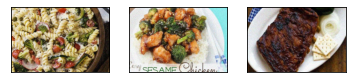

In [98]:
def plot_triplets(examples, imgSize):
    plt.figure(figsize=(6, 2))
    for i in range(3):
        plt.subplot(1, 3, 1 + i)
        plt.imshow(np.reshape(examples[i], (imgSize[1], imgSize[0], 3)))
        plt.xticks([])
        plt.yticks([])
    plt.show()

examples = create_batch(fold,1)
plot_triplets(examples,(450,300))

# Embedding layer

In [142]:
import tensorflow as tf

embedding_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(emb_size, activation='relu', input_shape=(imgSize[0]*imgSize[1]*3,)),
    tf.keras.layers.Dense(emb_size, activation='sigmoid')
])

embedding_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                18760     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
Total params: 18,870
Trainable params: 18,870
Non-trainable params: 0
_________________________________________________________________


In [143]:
imgSize

(25, 25)

# Siamese network

In [144]:
input_anchor = tf.keras.layers.Input(shape=(imgSize[0]*imgSize[1]*3,))
input_positive = tf.keras.layers.Input(shape=(imgSize[0]*imgSize[1]*3,))
input_negative = tf.keras.layers.Input(shape=(imgSize[0]*imgSize[1]*3,))

embedding_anchor = embedding_model(input_anchor)
embedding_positive = embedding_model(input_positive)
embedding_negative = embedding_model(input_negative)

output = tf.keras.layers.concatenate([embedding_anchor, embedding_positive, embedding_negative], axis=1)

net = tf.keras.models.Model([input_anchor, input_positive, input_negative], output)
net.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 1875)]       0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           [(None, 1875)]       0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           [(None, 1875)]       0                                            
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, 10)           18870       input_13[0][0]                   
                                                                 input_14[0][0]             

# Triplet loss

In [0]:
def triplet_loss(y_true, y_pred):
    anchor, positive, negative = y_pred[:,:emb_size], y_pred[:,emb_size:2*emb_size], y_pred[:,2*emb_size:]
    positive_dist = tf.reduce_mean(tf.square(anchor - positive), axis=1)
    negative_dist = tf.reduce_mean(tf.square(anchor - negative), axis=1)
    triplet_loss = tf.maximum(positive_dist - negative_dist + alpha, 0.)
    loss = tf.reduce_mean(triplet_loss)
    return loss

# Data generator

In [0]:
def data_generator(fold, batch_size=256, toSize = (10,10), flatten=True):
    while True:
        x = create_batch(fold, batch_size, toSize)
        y = np.zeros((batch_size, 3*emb_size))
        yield x, y

In [0]:
x, y = (next(data_generator(fold,2)))

# Training

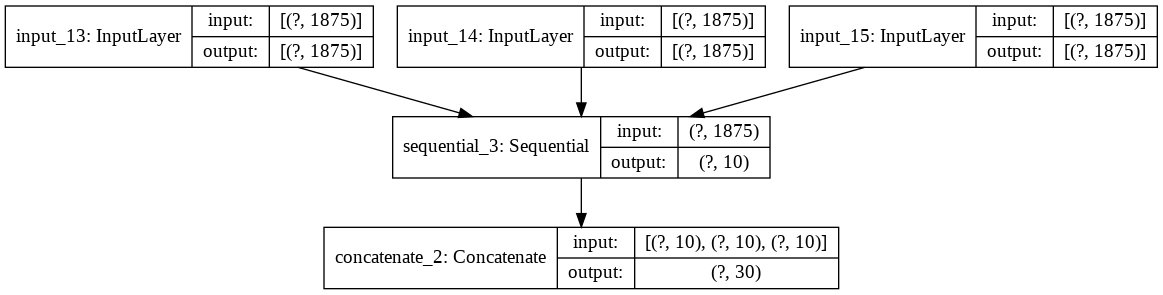

In [148]:
tf.keras.utils.plot_model(net, show_shapes=True, show_layer_names=True)

In [166]:
#from pca_plotter import PCAPlotter
import math

batch_size = 64
epochs = 20
steps_per_epoch = math.floor(fold.shape[0]/batch_size)

net.compile(loss=triplet_loss, optimizer='adamax')

result =  net.fit(
    data_generator(fold, batch_size, imgSize),
    steps_per_epoch=steps_per_epoch,
    epochs=epochs
)

Epoch 1/20
743/743 [==============================] - 9s 12ms/step - loss: 1.8041
Epoch 2/20
743/743 [==============================] - 9s 12ms/step - loss: 1.8001
Epoch 3/20
743/743 [==============================] - 9s 12ms/step - loss: 1.7939
Epoch 4/20
743/743 [==============================] - 9s 12ms/step - loss: 1.7936
Epoch 5/20
743/743 [==============================] - 9s 12ms/step - loss: 1.7949
Epoch 6/20
743/743 [==============================] - 9s 12ms/step - loss: 1.7943
Epoch 7/20
743/743 [==============================] - 9s 12ms/step - loss: 1.7933
Epoch 8/20
743/743 [==============================] - 9s 12ms/step - loss: 1.7977
Epoch 9/20
743/743 [==============================] - 9s 12ms/step - loss: 1.7948
Epoch 10/20
743/743 [==============================] - 9s 12ms/step - loss: 1.7898
Epoch 11/20
743/743 [==============================] - 9s 12ms/step - loss: 1.7937
Epoch 12/20
743/743 [==============================] - 9s 12ms/step - loss: 1.7900
Epoch 13/20
7

In [0]:
# saving as pickle object
pickle_out = open("net.pickle","wb")
pickle.dump(Model, pickle_out)
pickle_out.close()

# Test Prediciton, Binary result and saving result

In [0]:
# function for transforming predicted embeddings to required prediction 0 or 1
# anchor: dish A, positive: dish B, negative: dish C
# if distance A to B < A to C then A is more similar to B than to C -> return 1

def similar_dish(prediction):
    anchor, positive, negative = prediction[:emb_size], prediction[emb_size:2*emb_size], prediction[2*emb_size:]
    positive_dist = np.mean(np.square(anchor - positive))
    negative_dist = np.mean(np.square(anchor - negative))

    if positive_dist < negative_dist:
      return 1
    else:
      return 0

In [278]:
X = run_through(validate, toSize = imgSize, flatten=True)

predicted_embeddings = net.predict(X)
predicted_embeddings.shape

(11903, 30)

In [301]:
# making predictions for the test set in the first fold
sv_f1 = [similar_dish(emb) for emb in predicted_embeddings]
perc_accurate = round(np.sum(sv_f1)/len(sv_f1)*100,1)
print(f'The percentage of accurate predictions for the first fold test set is: {perc_accurate} %')

The percantage of accurate predictions for the first fold test set is: 57.1 %


In [310]:
D_test = np.array(D_test)
X = run_through(D_test, toSize = imgSize, flatten=True)

predicted_embeddings = net.predict(X)
predicted_embeddings.shape

(59544, 30)

In [314]:
# making predictions for the test set in the first fold
sv_pr = [similar_dish(emb) for emb in predicted_embeddings]
perc_accurate = round(np.sum(sv_f1)/len(sv_f1)*100,1)
print(f'The percentage of accurate predictions for the test set is: {perc_accurate} %')

The percentage of accurate predictions for the test set is: 48.0 %


In [0]:
# save to txt file
np.savetxt('result.txt', sv_pr, fmt='%i', )

In [309]:
type(validate)

numpy.ndarray